# When is posterior distribution close to Gaussian distribution


For the inverse problem, 
$$y = \mathcal{G}(\theta) + \eta$$

we already know the [posterior distribution](Bayesian.ipynb) 

$$ 
\begin{align*}
p(\theta|y) = \frac{1}{Z(y)} e^{-\frac{1}{2}\left(y - \mathcal{G}(\theta)\right)\Sigma_{\eta}^{-1}\left(y - \mathcal{G}(\theta)\right)} p_0(\theta) 
\end{align*}
$$

is Gaussian, when $\mathcal{G}$ is linear and the prior $p_0$ is Gaussian. A natural question is "When is posterior distribution close to Gaussian distribution".




## Rosenbrock likelihood function

We will explore the question with the following inverse problem 

$$
\mathcal{G}(\theta) 
=
\begin{bmatrix}
\theta_{(2)} - \epsilon \theta_{(1)}^2\\
\theta_{(1)}
\end{bmatrix} 
\qquad
\theta_{ref} = 
\begin{bmatrix}
1\\
1
\end{bmatrix} 
\qquad
\Sigma_{\eta} = 
\begin{bmatrix}
\sigma_{\eta_1}^2 & 0\\
0 & \sigma_{\eta_2}^2
\end{bmatrix} 
$$

which leads to the 2-dimensional Rosenbrock likelihood function
    
$$\exp\Big(-\frac{\left(y_1 - (\theta_{(2)} - \epsilon \theta_{(1)}^2)\right)^2}{2\sigma_{\eta_1}^2} - \frac{\left(y_2 - \theta_{(1)}\right)^2}{2\sigma_{\eta_2}^2}\Big)$$

We focus on the "uninformative" Gaussian prior $\mathcal{N}(0, 10^2 I)$.
     

In [2]:
include("../Inversion/Plot.jl")
include("../Inversion/RWMCMC.jl")
using LinearAlgebra

function func_G(s_param, θ::Array{Float64,1})
    θ₁, θ₂ = θ
    return [θ₂ - ϵ*θ₁^2; θ₁]
end

function log_prior(θ::Array{Float64,1})
    θ₁, θ₂ = θ
    return -(θ₁^2 + θ₂^2)/σ0^2/2
end

function log_Rosenbrock(θ::Array{Float64,1})
    θ₁, θ₂ = θ
    return -(y[1] - (θ₂ - ϵ*θ₁^2))^2/ση₁^2/2 - (y[2] - θ₁)^2/ση₂^2/2  + log_prior(θ)
end

μ0, σ0 = [0.0;0.0], 10.0
Σ0 = [σ0^2 0.0;0.0  σ0^2]

2×2 Array{Float64,2}:
 100.0    0.0
   0.0  100.0

## Case 1:

$$
\begin{align*}
    y  = \begin{bmatrix}
        0\\
        1
        \end{bmatrix}
    \qquad 
\Sigma_{\eta} = 
\begin{bmatrix}
\frac{1}{10}  & \\
0 & 10
\end{bmatrix}
\end{align*}\qquad 
\epsilon = 1
$$

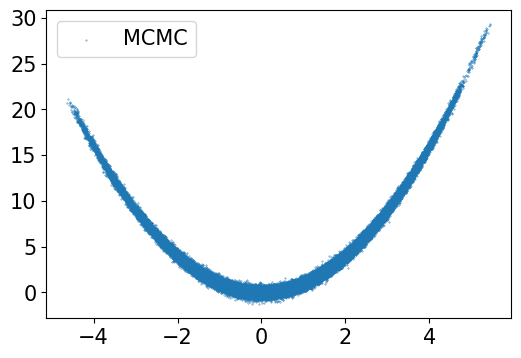

PyObject <matplotlib.legend.Legend object at 0x7ff222354df0>

In [20]:
ση₁, ση₂ = sqrt(1/10), sqrt(10)
Ση = [ση₁^2  0.0;  0.0  ση₂^2]
y = [0.0; 1.0]
ϵ = 1.0


# compute posterior distribution by MCMC

step_length = 0.1
n_ite = 10000000
#us = RWMCMC_Run(log_Rosenbrock, μ0, step_length, n_ite);
everymarker = 100
fig, ax = PyPlot.subplots(ncols=1, sharex=false, sharey=true, figsize=(6,4))
n_burn_in, n_end = 10^6, 10^7
ax.scatter(us[n_burn_in:everymarker:n_end, 1], us[n_burn_in:everymarker:n_end, 2], s = 0.1, label="MCMC")
ax.legend()

# When $\mathcal{G}(\theta)$ is close to linear

We consider 
$$
\begin{align*}
    y  = \begin{bmatrix}
        0\\
        1
        \end{bmatrix}
    \qquad 
\Sigma_{\eta} = 
\begin{bmatrix}
\frac{1}{10}  & \\
0 & 10
\end{bmatrix}
\end{align*}\qquad 
\epsilon = 0.1, \quad 0.01, \quad 0.001,\quad\textrm{and}\quad 0.0001. 
$$


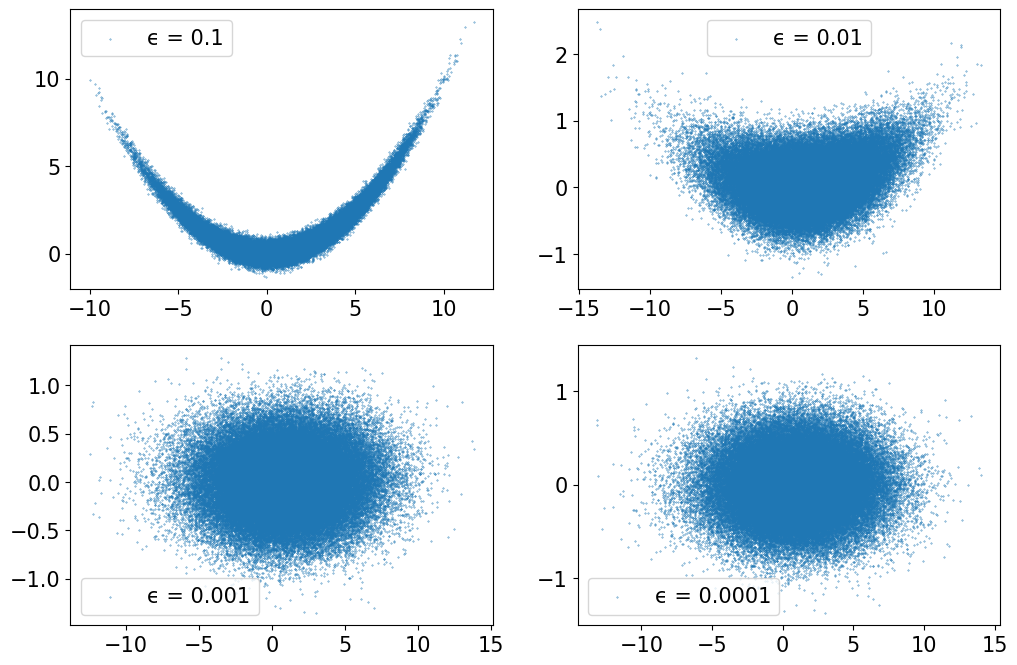

PyObject <matplotlib.legend.Legend object at 0x7ff2326eb4c0>

In [4]:
ση₁, ση₂ = sqrt(1/10), sqrt(10)
Ση = [ση₁^2  0.0;  0.0  ση₂^2]
y = [0.0; 1.0]



# compute posterior distribution by MCMC

step_length = 0.1
n_ite = 10000000
everymarker = 100
fig, ax = PyPlot.subplots(ncols=2, nrows=2, sharex=false, sharey=false, figsize=(12,8))
n_burn_in, n_end = 10^6, 10^7

ϵ = 0.1
us = RWMCMC_Run(log_Rosenbrock, μ0, step_length, n_ite);
ax[1,1].scatter(us[n_burn_in:everymarker:n_end, 1], us[n_burn_in:everymarker:n_end, 2], s = 0.1, label="ϵ = $(ϵ)")
ax[1,1].legend()

ϵ = 0.01
us = RWMCMC_Run(log_Rosenbrock, μ0, step_length, n_ite);
ax[1,2].scatter(us[n_burn_in:everymarker:n_end, 1], us[n_burn_in:everymarker:n_end, 2], s = 0.1, label="ϵ = $(ϵ)")
ax[1,2].legend()

ϵ = 0.001
us = RWMCMC_Run(log_Rosenbrock, μ0, step_length, n_ite);
ax[2,1].scatter(us[n_burn_in:everymarker:n_end, 1], us[n_burn_in:everymarker:n_end, 2], s = 0.1, label="ϵ = $(ϵ)")
ax[2,1].legend()

ϵ = 0.0001
us = RWMCMC_Run(log_Rosenbrock, μ0, step_length, n_ite);
ax[2,2].scatter(us[n_burn_in:everymarker:n_end, 1], us[n_burn_in:everymarker:n_end, 2], s = 0.1, label="ϵ = $(ϵ)")
ax[2,2].legend()

# When observation error covariance is small

We consider 
$$
\begin{align*}
    y  = \begin{bmatrix}
        0\\
        1
        \end{bmatrix}
    \qquad 
\Sigma_{\eta} = 
\frac{1}{N_{\eta}}\begin{bmatrix}
\frac{1}{10}  & \\
0 & 10
\end{bmatrix}
\end{align*}\qquad 
\epsilon = 1 
$$

with $N_{\eta} = 100,\, 1000,\, 10000,\,100000$. It is worth mentioning when $N_{\eta} = 100000$, the observation error is about 1 percent.

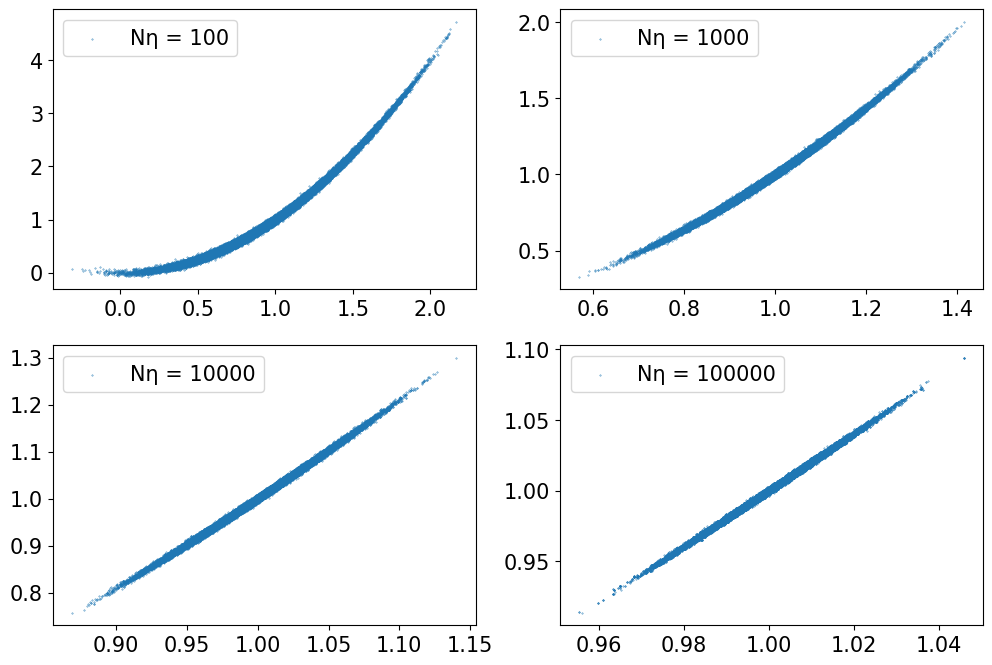

PyObject <matplotlib.legend.Legend object at 0x7ff22126b160>

In [5]:
y = [0.0; 1.0]
ϵ = 1


# compute posterior distribution by MCMC

step_length = 0.1
n_ite = 10000000
everymarker = 100
fig, ax = PyPlot.subplots(ncols=2, nrows=2, sharex=false, sharey=false, figsize=(12,8))
n_burn_in, n_end = 10^6, 10^7


Nη = 100
ση₁, ση₂ = sqrt(1/10)/sqrt(Nη), sqrt(10)/sqrt(Nη)
Ση = [ση₁^2  0.0;  0.0  ση₂^2]

us = RWMCMC_Run(log_Rosenbrock, μ0, step_length, n_ite);
ax[1,1].scatter(us[n_burn_in:everymarker:n_end, 1], us[n_burn_in:everymarker:n_end, 2], s = 0.1, label="Nη = $(Nη)")
ax[1,1].legend()

Nη = 1000
ση₁, ση₂ = sqrt(1/10)/sqrt(Nη), sqrt(10)/sqrt(Nη)
Ση = [ση₁^2  0.0;  0.0  ση₂^2]

us = RWMCMC_Run(log_Rosenbrock, μ0, step_length, n_ite);
ax[1,2].scatter(us[n_burn_in:everymarker:n_end, 1], us[n_burn_in:everymarker:n_end, 2], s = 0.1, label="Nη = $(Nη)")
ax[1,2].legend()

Nη = 10000
ση₁, ση₂ = sqrt(1/10)/sqrt(Nη), sqrt(10)/sqrt(Nη)
Ση = [ση₁^2  0.0;  0.0  ση₂^2]

us = RWMCMC_Run(log_Rosenbrock, μ0, step_length, n_ite);
ax[2,1].scatter(us[n_burn_in:everymarker:n_end, 1], us[n_burn_in:everymarker:n_end, 2], s = 0.1, label="Nη = $(Nη)")
ax[2,1].legend()

Nη = 100000
ση₁, ση₂ = sqrt(1/10)/sqrt(Nη), sqrt(10)/sqrt(Nη)
Ση = [ση₁^2  0.0;  0.0  ση₂^2]

us = RWMCMC_Run(log_Rosenbrock, μ0, step_length, n_ite);
ax[2,2].scatter(us[n_burn_in:everymarker:n_end, 1], us[n_burn_in:everymarker:n_end, 2], s = 0.1, label="Nη = $(Nη)")
ax[2,2].legend()

# When there is large observation data

$$
\begin{align*}
    \theta_{ref}  = \begin{bmatrix}
        1\\
        1
        \end{bmatrix}
    \qquad 
\Sigma_{\eta} = 
\begin{bmatrix}
\frac{1}{10}  & \\
0 & 1
\end{bmatrix}
\end{align*}\qquad 
\epsilon = 1
$$


We generate $N$ observation data

$$y_i = \mathcal{G}(\theta) + \eta_i\qquad (i = 1,\,2,\,\cdots N)$$

The inverse problem becomes

$$ \mathbf{y} = \mathbf{\mathcal{G}}(\theta) + \boldsymbol{\eta} $$
    
where

$$
\begin{align*} 
&\mathbf{y} 
= \begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_{N_y}
\end{bmatrix}
\qquad 
\mathbf{\mathcal{G}}(\theta)
= \begin{bmatrix}
\mathcal{G}(\theta) \\
\mathcal{G}(\theta) \\
\vdots\\
\mathcal{G}(\theta)\\
\end{bmatrix} \\
&\boldsymbol{\eta} \sim \mathcal{N}(\boldsymbol{0}, \Sigma_{\boldsymbol{\eta}}) \qquad 
\Sigma_{\boldsymbol{\eta}} = \textrm{diag}\Big(\Sigma_{\eta},\,\cdots,\, \Sigma_{\eta}\Big)
\end{align*}
$$




┌ Info: ("N = ", 10)
└ @ Main In[29]:30
┌ Info: ("N = ", 1000)
└ @ Main In[29]:38


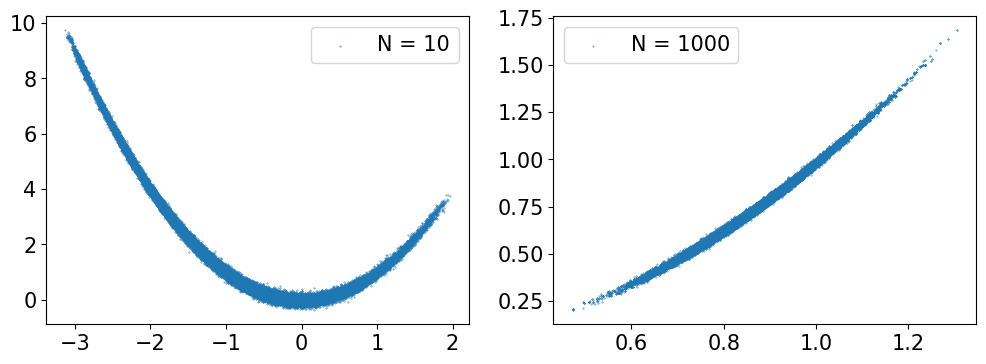

PyObject <matplotlib.legend.Legend object at 0x7ff21267a6d0>

In [29]:
using Distributions
using Random
θ_ref = [1.0; 1.0]
ση₁, ση₂ = sqrt(1/10), sqrt(10)
Ση = [ση₁^2  0.0;  0.0  ση₂^2]
ϵ = 1.0

function log_Rosenbrock_bm(θ::Array{Float64,1})
    θ₁, θ₂ = θ
    log_posterior = log_prior(θ)
    G₁, G₂ = (θ₂ - ϵ*θ₁^2), θ₁
    for i = 1:N
        log_posterior += -(y_bm[2i-1] - G₁)^2/ση₁^2/2 - (y_bm[2i] - G₂)^2/ση₂^2/2 
    end
    return log_posterior

end

# compute posterior distribution by MCMC

step_length = 0.1
n_ite = 1000000
everymarker = 10
fig, ax = PyPlot.subplots(ncols=2, nrows=1, sharex=false, sharey=false, figsize=(12,4))
n_burn_in, n_end = div(n_ite,10), n_ite


N = 10
y_bm = rand(MvNormal(func_G(nothing, θ_ref), Ση), N)[:]
@info "N = ", N
us = RWMCMC_Run(log_Rosenbrock_bm, μ0, step_length, n_ite);
ax[ 1].scatter(us[n_burn_in:everymarker:n_end, 1], us[n_burn_in:everymarker:n_end, 2], s = 0.1, label="N = $(N)")
ax[ 1].legend()


N = 1000
y_bm = rand(MvNormal(func_G(nothing, θ_ref), Ση), N)[:]
@info "N = ", N
us = RWMCMC_Run(log_Rosenbrock_bm, μ0, step_length, n_ite);
ax[ 2].scatter(us[n_burn_in:everymarker:n_end, 1], us[n_burn_in:everymarker:n_end, 2], s = 0.1, label="N = $(N)")
ax[ 2].legend()